In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import sklearn.linear_model

In [2]:
dfWhite = pd.read_csv('../white.csv')
dfMiscWhite = pd.read_csv('../misc_white.csv')
dfEmpty = pd.read_csv('../empty.csv')
dfBlack = pd.read_csv('../black.csv')
dfMiscBlack = pd.read_csv('../misc_black.csv')
dfRed = pd.read_csv('../red120ms.csv')
dfGreen = pd.read_csv('../green120ms.csv')
dfBulk = pd.read_csv('../../Orchestrator.Driver/CollectedData/bulk.csv')
dfWrong = dfBulk.iloc[[1, 7, 9, 10, 11, 12, 13, 14, 15, 16, 20, 21, 31]]
dfWrong

#dfConveyor = pd.read_csv('data4.csv')
# dfWhite.head(100)

,Function,Red,Green,Blue,Clear,ColorTemp,Lux
1,1,2473,3761,2663,9405,5532,3184
7,1,2446,3537,2545,8979,5508,2925
9,1,2637,3815,2760,9677,5548,3145
10,1,2466,3946,2867,9759,5853,3329
11,1,2766,3754,2751,9672,5454,3013
12,1,2493,3974,2955,9886,6032,3300
13,1,2411,3448,2467,8755,5437,2853
14,1,2383,3430,2195,8409,4822,3033
15,1,2633,3616,2613,9406,5389,2940
16,1,2614,3735,2694,9493,5491,3074


In [3]:
dfWhite.columns

Index(['Red', 'Green', 'Blue', 'Clear', 'ColorTemp', 'Lux'], dtype='object')

In [4]:
dfWhitePoints = dfWhite[['Red','Green','Blue']].values
dfEmptyPoints = dfEmpty[['Red','Green','Blue']].values
dfBlackPoints = dfBlack[['Red','Green','Blue']].values
dfWhiteTriangles = Delaunay(dfWhitePoints[:, :2])

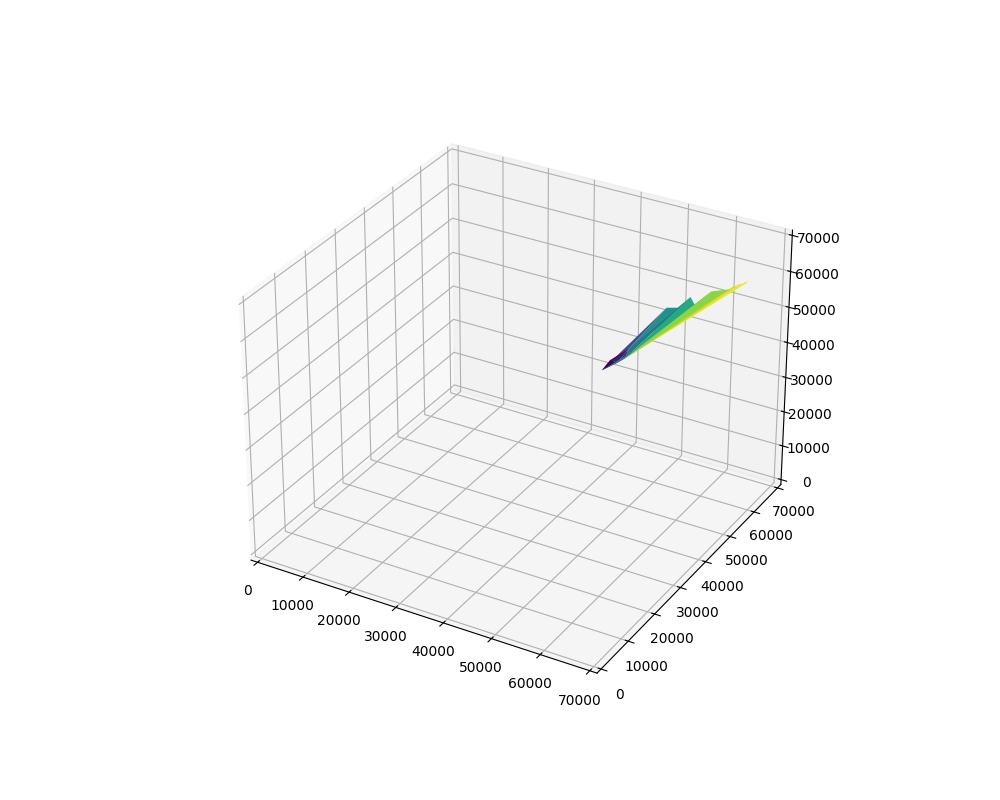

In [5]:
%matplotlib widget
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)
ax.set_zlim(0, 70000)
# Plot the surface
ax.plot_trisurf(dfWhitePoints[:, 0], dfWhitePoints[:, 1], dfWhitePoints[:, 2], triangles=dfWhiteTriangles.simplices, cmap='viridis', edgecolor='none')

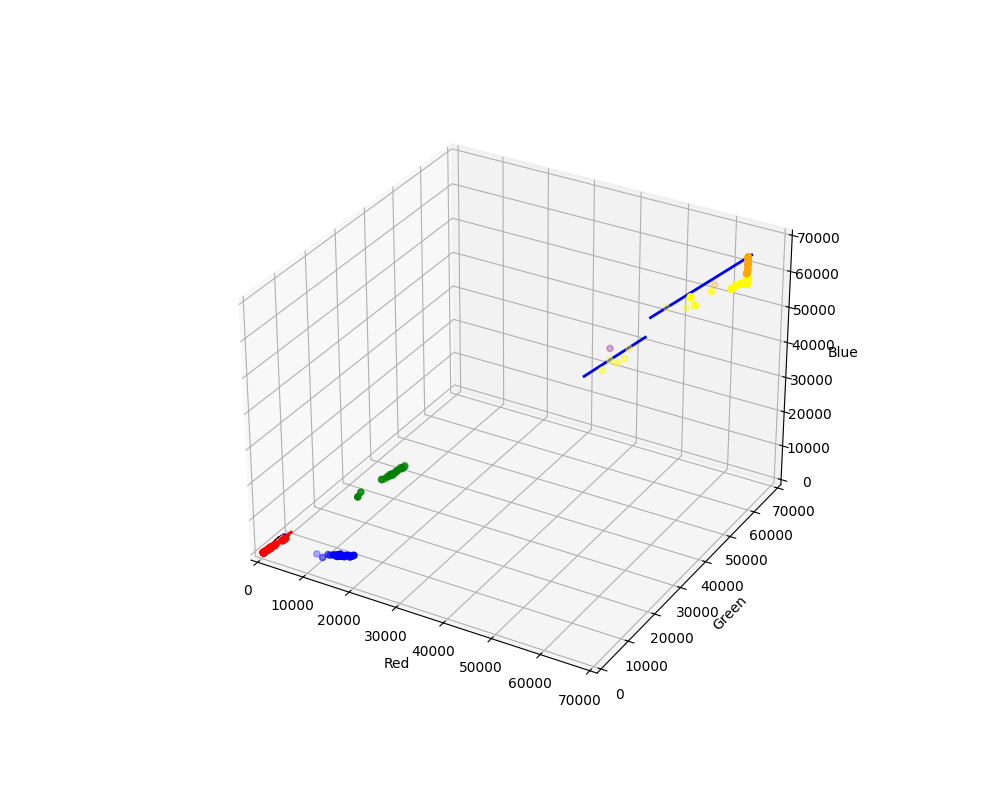

In [22]:
%matplotlib widget
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)
ax.set_zlim(0, 70000)
# ax.set_xlim(1000, 4000)
# ax.set_ylim(1000, 4000)
# ax.set_zlim(1000, 4000)
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")

black_line_A = np.array([1500, 2444, 1611])
black_line_B = np.array([3000, 4370, 3342])

white_line_A = np.array([46000, 64800, 42000])
white_line_B = np.array([66000, 66000, 66000])

offwhite_line_A = np.array([40000, 50000, 32500])
offwhite_line_B = np.array([47500, 60000, 40000])

empty_line_A = np.array([0, 0, 0])
empty_line_B = np.array([4000, 4000, 5000])


fg1 = ax.scatter3D(dfWhite['Red'], dfWhite['Green'], dfWhite['Blue'], color='yellow')
fg1 = ax.scatter3D(dfMiscWhite['Red'], dfMiscWhite['Green'], dfMiscWhite['Blue'], color='orange')

fg2 = ax.scatter3D(dfEmpty['Red'], dfEmpty['Green'], dfEmpty['Blue'], color='red')

fg3 = ax.scatter3D(dfBlack['Red'], dfBlack['Green'], dfBlack['Blue'], color='black')

fg3 = ax.scatter3D(dfGreen['Red'], dfGreen['Green'], dfGreen['Blue'], color='green')

fg3 = ax.scatter3D(dfRed['Red'], dfRed['Green'], dfRed['Blue'], color='blue')
fg3 = ax.scatter3D(dfMiscBlack['Red'], dfMiscBlack['Green'], dfMiscBlack['Blue'], color='pink')
fg3 = ax.scatter3D(dfWrong['Red'], dfWrong['Green'], dfWrong['Blue'], color='purple')

plt.plot([black_line_A[0], black_line_B[0]], [black_line_A[1], black_line_B[1]], [black_line_A[2], black_line_B[2]], color='black', lw=2);
plt.plot([empty_line_A[0], empty_line_B[0]], [empty_line_A[1], empty_line_B[1]], [empty_line_A[2], empty_line_B[2]], color='red', lw=2);
plt.plot([white_line_A[0], white_line_B[0]], [white_line_A[1], white_line_B[1]], [white_line_A[2], white_line_B[2]], color='blue', lw=2);
plt.plot([offwhite_line_A[0], offwhite_line_B[0]], [offwhite_line_A[1], offwhite_line_B[1]], [offwhite_line_A[2], offwhite_line_B[2]], color='blue', lw=2);

# plt.plot(2300, 3000, 3000, 'bo');
# plt.plot([45000, 65536], [0, 3500], [0, 3500], color='red', lw=2);
#dfEmpty
#fg4 = ax.scatter3D(dfConveyor['r'], dfConveyor['g'], dfConveyor['b'])

In [7]:
def point_to_line_distance(P, A, B):
    AP = P - A
    AB = B - A
    cross_product = np.cross(AP, AB)
    distance = np.linalg.norm(cross_product) / np.linalg.norm(AB)
    return distance

# Calculate distances
distances = [point_to_line_distance(P, black_line_A, black_line_B) for P in dfBlackPoints]

# Create DataFrame
df_distances_black = pd.DataFrame(dfBlackPoints, columns=['red', 'green', 'blue'])
df_distances_black['distance_to_line'] = distances

print(df_distances_black)

     red  green  blue  distance_to_line
0   2046   3278  2384         98.988715
1   2018   3262  2348        103.652682
2   2051   3293  2351         89.309934
3   2055   3309  2356         94.942311
4   2081   3359  2432        113.438698
5   2033   3346  2402        140.833824
6   1983   3338  2422        187.139214
7   1965   3305  2389        179.299450
8   1946   3264  2358        170.205779
9   1930   3224  2295        148.409037
10  1932   3277  2353        185.394167
11  2005   3344  2417        168.593961
12  2034   3357  2401        144.767497
13  2046   3342  2416        132.030956
14  2043   3346  2390        129.557759
15  2055   3379  2432        144.107503
16  2084   3413  2468        143.403589
17  2105   3360  2390         85.553563
18  2096   3401  2465        127.249533
19  2125   3451  2486        129.689732
20  2133   3476  2501        138.022627
21  1813   2881  2156        135.636083
22  1922   3171  2271        127.085963
23  2078   3332  2407         97.600901


In [8]:
df_distances_black['distance_to_line'].max()

213.56253740503686

In [9]:
  def angle_between_vector_and_point_AP(P, A, B):
    AP = P - A
    AB = B - A
    
    dot_product_AP = np.dot(AP, AB)
    
    mag_AP = np.linalg.norm(AP)
    mag_AB = np.linalg.norm(AB)
    
    cos_theta_AP = dot_product_AP / (mag_AP * mag_AB)
    
    angle_rad_AP = np.arccos(np.clip(cos_theta_AP, -1.0, 1.0))
    
    angle_deg_AP = np.degrees(angle_rad_AP)
    
    return angle_deg_AP


def angle_between_vector_and_point_BP(P, A, B):
    AB = B - A
    BP = B - P
    
    dot_product_BP = np.dot(BP, AB)
    
    mag_AB = np.linalg.norm(AB)
    mag_BP = np.linalg.norm(BP)
    
    cos_theta_BP = dot_product_BP / (mag_BP * mag_AB)
    
    angle_rad_BP = np.arccos(np.clip(cos_theta_BP, -1.0, 1.0))

    angle_deg_BP = np.degrees(angle_rad_BP)
    
    return angle_deg_BP

angles_deg_AP = [angle_between_vector_and_point_AP(P, black_line_A, black_line_B) for P in dfBlackPoints]
angles_deg_BP = [angle_between_vector_and_point_BP(P, black_line_A, black_line_B) for P in dfBlackPoints]

df_angles_black = pd.DataFrame(dfBlackPoints, columns=['red', 'green', 'blue'])
df_angles_black['AP-angle'] = angles_deg_AP
df_angles_black['BP-angle'] = angles_deg_BP

#df_angles_black = df_angles_black[df_angles_black['AP-angle'] <= 90]
#df_angles_black = df_angles_black[df_angles_black['BP-angle'] <= 90]

print(df_angles_black)

     red  green  blue   AP-angle  BP-angle
0   2046   3278  2384   4.500829  3.265241
1   2018   3262  2348   4.886619  3.332214
2   2051   3293  2351   4.084734  2.934872
3   2055   3309  2356   4.289467  3.147001
4   2081   3359  2432   4.785649  3.962491
5   2033   3346  2402   6.158521  4.770871
6   1983   3338  2422   8.276062  6.259743
7   1965   3305  2389   8.246051  5.831983
8   1946   3264  2358   8.184828  5.374259
9   1930   3224  2295   7.594005  4.514897
10  1932   3277  2353   8.915407  5.845691
11  2005   3344  2417   7.397462  5.683338
12  2034   3357  2401   6.295657  4.923819
13  2046   3342  2416   5.723826  4.505935
14  2043   3346  2390   5.677114  4.385449
15  2055   3379  2432   6.071546  5.028371
16  2084   3413  2468   5.798883  5.184181
17  2105   3360  2390   3.644046  2.969467
18  2096   3401  2465   5.161906  4.592901
19  2125   3451  2486   5.050461  4.860381
20  2133   3476  2501   5.270376  5.269916
21  1813   2881  2156  10.206150  3.466274
22  1922   

In [10]:
df_angles_black.max()

red         2356.000000
green       3550.000000
blue        2636.000000
AP-angle      13.717799
BP-angle       7.991152
dtype: float64

In [11]:
def point_to_line_distance(P, A, B):
    AP = P - A
    AB = B - A
    cross_product = np.cross(AP, AB)
    distance = np.linalg.norm(cross_product) / np.linalg.norm(AB)
    return distance

# Define the line points
A = np.array([48000, 64800, 44000])
B = np.array([66000, 66500, 61000])


# Calculate distances
distances = [point_to_line_distance(P, A, B) for P in dfWhitePoints]

# Create DataFrame
df_distances_white = pd.DataFrame(dfWhitePoints, columns=['red', 'green', 'blue'])
df_distances_white['distance_to_line'] = distances

print(df_distances_white)

      red  green   blue  distance_to_line
0   62991  65535  56653       1252.045591
1   64645  65535  57742       1618.364100
2   62405  65535  55545       1587.514680
3   62413  65535  55556       1585.457589
4   62410  65535  55551       1586.815017
..    ...    ...    ...               ...
86  58251  65535  53411        294.993225
87  53133  65535  46953       1418.607823
88  65535  65535  59879       1015.983941
89  65535  65535  59863       1021.056638
90  65535  65535  59868       1019.459814

[91 rows x 4 columns]


In [12]:
top_10_dist = df_distances_white['distance_to_line'].nlargest(10)
top_10_dist

81    12732.335246
80    11221.540288
82    10900.682377
83     9934.686355
84     7640.509845
41     1972.677548
40     1966.874597
39     1965.585696
42     1963.652785
44     1703.897685
Name: distance_to_line, dtype: float64

In [13]:
def point_to_line_distance(P, A, B):
    AP = P - A
    AB = B - A
    cross_product = np.cross(AP, AB)
    distance = np.linalg.norm(cross_product) / np.linalg.norm(AB)
    return distance

# Define the line points
A = np.array([0, 0, 0])
B = np.array([3100, 3600, 3600])


# Calculate distances
distances = [point_to_line_distance(P, A, B) for P in dfEmptyPoints]

# Create DataFrame
df_distances_empty = pd.DataFrame(dfEmptyPoints, columns=['red', 'green', 'blue'])
df_distances_empty['distance_to_line'] = distances

print(df_distances_empty)

      red  green  blue  distance_to_line
0     267    270   208         68.219452
1     252    258   198         63.723103
2     237    229   176         65.311673
3     265    269   207         67.477058
4     241    245   188         61.618952
..    ...    ...   ...               ...
135   923   1021   895        122.279589
136   759    830   734         99.774121
137   889    978   861        117.209689
138  1098   1207  1067        141.832050
139  1050   1160  1029        130.434828

[140 rows x 4 columns]


In [14]:
top_10_dist = df_distances_empty['distance_to_line'].nlargest(10)
top_10_dist

43     302.881153
44     245.160415
45     208.034013
46     183.802732
68     181.966544
110    152.929066
47     151.755849
114    142.699960
138    141.832050
67     140.236616
Name: distance_to_line, dtype: float64

In [15]:
dfWhite_train, dfWhite_test = train_test_split(dfWhite, test_size=0.2, random_state=50000)

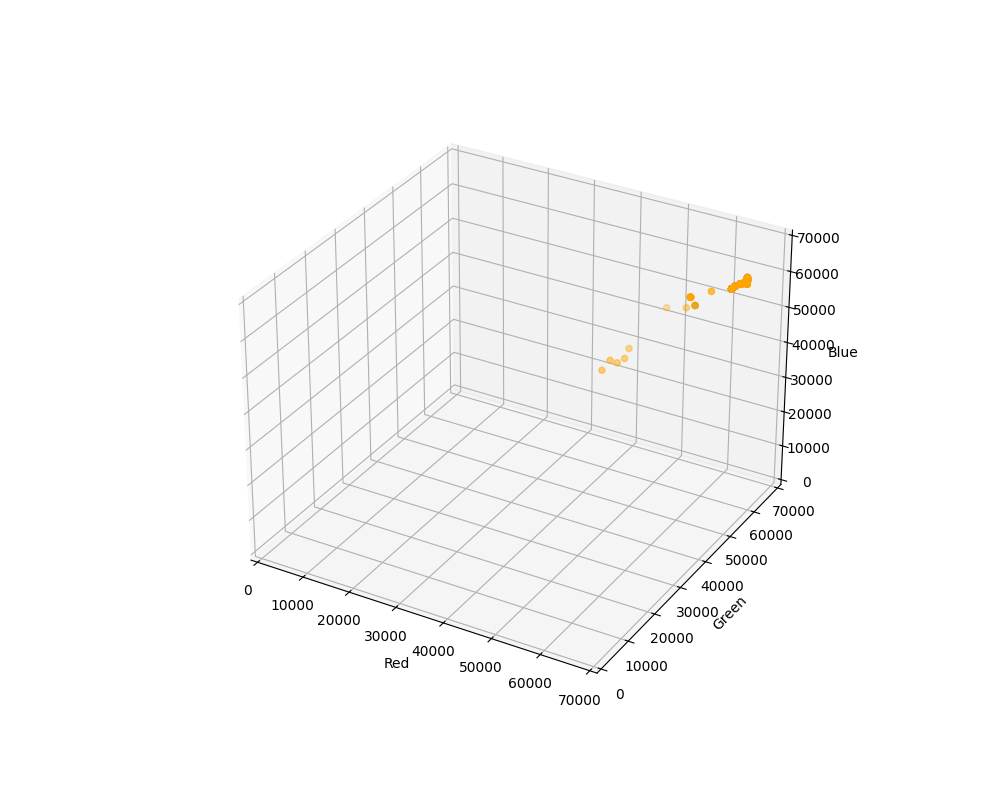

In [16]:
%matplotlib widget
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
ax.set_xlim(0, 70000)
ax.set_ylim(0, 70000)
ax.set_zlim(0, 70000)
ax.set_xlabel("Red")
ax.set_ylabel("Green")
ax.set_zlabel("Blue")

fg1 = ax.scatter3D(dfWhite_train['Red'], dfWhite_train['Green'], dfWhite_train['Blue'], color='orange')

fg2 = ax.scatter3D(dfWhite_test['Red'], dfWhite_test['Green'], dfWhite_test['Blue'], color='black')

#fg3 = ax.scatter3D(dfBlack['Red'], dfBlack['Green'], dfBlack['Blue'], color='black')

$y = \beta_0 + \sum_{i = 1}^m \beta_i x_i$

* $\beta_0$ and $\beta_i$ - fitted parameters
* $y$ - dependent variable
* $x_i$ - independent variables
* `reg.intercept_` - $\beta_0$ 
* `reg.coef_` - $\beta_i$ for $1 \leq i \leq m$.

In [17]:
#Linear regression for the Red
X_reg_train = dfWhite_train[['Green','Blue']].copy()
y_reg_train = dfWhite_train[['Red']].copy()

X_reg_train = dfWhite_test[['Green','Blue']].copy()
y_reg_train = dfWhite_test[['Red']].copy()

reg = LinearRegression()

reg.fit(X_reg_train.values, y_reg_train)

reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1]

(1838.0769519379464, 0.0, 1.0827773615644154)

In [18]:
#Linear regression for the Green
X_reg_train = dfWhite_train[['Red','Blue']].copy()
y_reg_train = dfWhite_train[['Green']].copy()

X_reg_train = dfWhite_test[['Red','Blue']].copy()
y_reg_train = dfWhite_test[['Green']].copy()

reg = LinearRegression()

reg.fit(X_reg_train.values, y_reg_train)

reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1]

(65535.0, 0.0, 0.0)

In [19]:
#Linear regression for the Blue
X_reg_train = dfWhite_train[['Red','Green']].copy()
y_reg_train = dfWhite_train[['Blue']].copy()

X_reg_train = dfWhite_test[['Red','Green']].copy()
y_reg_train = dfWhite_test[['Blue']].copy()

reg = LinearRegression()

reg.fit(X_reg_train.values, y_reg_train)

reg.intercept_[0], reg.coef_[0][0], reg.coef_[0][1]

(1097.9989742623293, 0.8792146858302761, 0.0)

In [20]:
dfWhite['Blue_predicted'] = reg.predict(dfWhite[['Red','Green']].values) 
dfWhite[['Blue','Blue_predicted']]

,Blue,Blue_predicted
0,56653,56480.611249
1,57742,57934.832340
2,55545,55965.391444
3,55556,55972.425161
4,55551,55969.787517
...,...,...
86,53411,52313.133639
87,46953,47813.312876
88,59879,58717.333410
89,59863,58717.333410
